# Steel Data Team: King County Housing Market Analysis

## Introduction

The goal of this notebook is to inform KC Real Estate Agency about what factors of a home have the greatest effects on the price. We will be using data from the King County website.

## Business Understanding

__Stakeholder:__  KC Real Estate

__Problem:__  Our Stakeholder needs to tell home owners which home renovations will have the biggest impact on sale price

__Subproblem:__

__Assumptions:__


## Data Understanding

There is 1 csv file that we are getting our data from.  In this section we will explore the data and learn the size and shape of our dataset.  We will also gain an understanding of the housing features presented in this dataset.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import plotly.express as px

In [2]:
# read CSV file
df=pd.read_csv('data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

- Our dataset has 21597 records and 21 columns
- we have 3 columns with missing values

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Note that the mean for 'bedrooms' 3.37 and the max for bedrooms is 33.  This is an easy outlier to spot. 

C:\Users\wharr\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

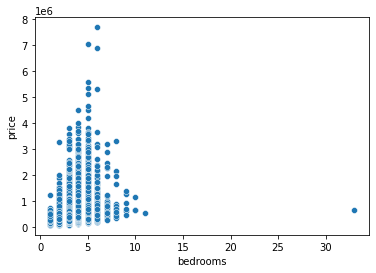

In [6]:
# look for outliers
sns.scatterplot(df['bedrooms'],df['price'])


In [7]:
# look for the specifics of that outlier
df.loc[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,...,7 Average,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


The house with 33 bedrooms only costs $640,000.  Also this house has 1.75 bathrooms.  This record holds an outlier and the rest of the features do not add up.  We will drop this outlier from our dataset.

In [8]:
# we will drop this outlier by using the record index.
df=df.drop(15856)

Check to see if we dropped the right record.

In [9]:
df.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159600e+04,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,17754.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,4.580575e+09,5.402920e+05,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,1788.631506,1971.000787,83.641489,98077.950685,47.560087,-122.213977,1986.650722,12758.656649
std,2.876764e+09,3.673760e+05,0.904114,0.768998,918.122038,4.141355e+04,0.539685,827.763251,29.375460,399.957185,53.514040,0.138552,0.140725,685.231768,27275.018316
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308950e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


we can confirm that we dropped the right record because max bedrooms is now 11.

#### Lets check the correlation between one of our features and 'price'

C:\Users\wharr\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

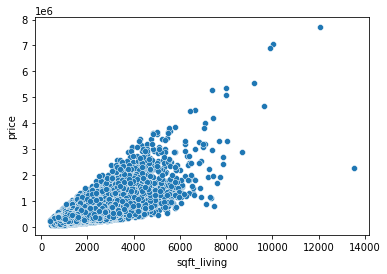

In [10]:
sns.scatterplot(df['sqft_living'],df['price'])

In [11]:
# look for the outlier on the far right
df.loc[df['sqft_living']== 13540].T

,12764
id,1225069038
date,5/5/2014
price,2.28e+06
bedrooms,7
bathrooms,8
sqft_living,13540
sqft_lot,307752
floors,3
waterfront,NO
view,EXCELLENT


This is a huge outlier in regards to 'sqft_living', so we are going to drop it.

In [12]:
# We again drop this record by using the record the index
df.drop(12764, inplace=True)

In [13]:
# Confirm that the record(12764) has been dropped from our dataframe.
df[12763:12766]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12763,7228500610,3/30/2015,510000.0,2,1.0,1070,5280,1.0,NO,NONE,...,6 Low Average,1070,0.0,1900,NaN,98122,47.6168,-122.303,1380,2370
12765,5162100650,9/22/2014,316000.0,4,2.5,2320,7379,2.0,NO,NONE,...,8 Good,2320,0.0,1987,0.0,98003,47.3432,-122.316,2230,7614
12766,3904902510,5/12/2014,690000.0,4,2.5,2670,13463,2.0,NO,NONE,...,9 Better,2670,?,1989,0.0,98029,47.5627,-122.018,2560,10982


In [14]:
# check the one with the highest price
df.loc[df['price'] == df['price'].max()].T
# this one makes sense and it also look like it's following the trend

,7245
id,6762700020
date,10/13/2014
price,7.7e+06
bedrooms,6
bathrooms,8
sqft_living,12050
sqft_lot,27600
floors,2.5
waterfront,NO
view,GOOD


## Data Cleaning

In [15]:
df['view'].value_counts()

NONE         19421
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      316
Name: view, dtype: int64

In [16]:
# See how many null values are in this column
df['view'].isna().sum()

63

We are going to convert these 63 null values to NONE because the majority of our none values are none

In [17]:
# fill in the null values with None, assuming sometimes people don't fill it in when there's minimum view
df['view'] = df['view'].fillna('NONE')

In [18]:
# check our work
df['view'].isna().sum()

0

##### Convert categoricals into int or float values

the view column has categorical data.  We can easily convert this into numeric data with dictionary mapping.

In [19]:
# Map our string values to numeric values
view_dict = {'NONE': 1,
            'FAIR': 2,
             'AVERAGE':3,
            'GOOD': 4,
            'EXCELLENT': 5}
df['view'].replace(view_dict, inplace=True)

In [20]:
# check to see if there's null values in the column
df['condition'].isna().sum()

0

In [21]:
df['condition'].value_counts()

Average      14019
Good          5677
Very Good     1700
Fair           170
Poor            29
Name: condition, dtype: int64

In [22]:
# # Create dictionary for mapping onto condition
cond_dict = {'Poor': 1,
             'Fair': 2,
             'Average': 3,
             'Good': 4,
             'Very Good': 5}

In [23]:
# Replace categorical values with numeric values
df['condition'].replace(cond_dict, inplace=True)

In [24]:
df['grade'].value_counts().sort_index()

10 Very Good     1134
11 Excellent      399
12 Luxury          88
13 Mansion         13
3 Poor              1
4 Low              27
5 Fair            242
6 Low Average    2038
7 Average        8973
8 Good           6065
9 Better         2615
Name: grade, dtype: int64

In [25]:
# mapped dicitonary to change grade to numeric values
grade_dict = {'3 Poor': 3,
             '4 Low': 4,
             '5 Fair': 5,
             '6 Low Average': 6,
             '7 Average': 7,
             '8 Good': 8,
             '9 Better': 9,
             '10 Very Good': 10,
             '11 Excellent': 11,
             '12 Luxury': 12,
             '13 Mansion': 13}
df['grade'].replace(grade_dict, inplace=True)

In [26]:
df['grade'].value_counts()

7     8973
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

In [27]:
df['waterfront'].value_counts()

NO     19073
YES      146
Name: waterfront, dtype: int64

In [28]:
df['waterfront'].isna().sum()

2376

In [90]:
# look at where the houses with missing values in the waterfront column are
fig_waterfront = px.scatter_mapbox(df[df['waterfront'].isna()==True],
                       lat='lat',
                       lon='long',
                       color='price',
                       zoom=8)
fig_waterfront.update_layout(mapbox_style='open-street-map')
fig_waterfront.show()

In [91]:
# look at where the houses with YES in the waterfront column are
fig_waterfront_y = px.scatter_mapbox(df[df['waterfront']=='YES'],
                       lat='lat',
                       lon='long',
                       color='price',
                       zoom=8)
fig_waterfront_y.update_layout(mapbox_style='open-street-map')
fig_waterfront_y.show()

The id column does not relate to anything in our analysis so we can drop that column

In [31]:
df.drop('id', axis=1, inplace=True)

In [32]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,1,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,1,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,1,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,1,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,1,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Visualize home prices to see if there's a pattern

In [33]:
loc_df = df[['lat', 'long', 'price']]

In [34]:
fig = px.scatter_mapbox(loc_df[loc_df['price'] < 2000000],
                       lat='lat',
                       lon='long',
                       color='price',
                       zoom=8)
fig.update_layout(mapbox_style='open-street-map')
fig.show()

figbot.savefig('Images/Worst Case Return on Investment by Genre.png')


It seems that the most expensive houses are concentrated around the central point in Lake Washington

In [35]:
# Add a distance column to indicate distance from the central point of seatle 47.6062° N, 122.3321° W
df['distance'] = np.sqrt((df['lat']-47.6062)**2 + (df['long'] + 122.3321)**2)

In [36]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,distance
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,1,3,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.121099
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,1,3,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.115545
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,1,3,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0.164820
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,1,5,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.104890
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,1,3,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.287296


array([[<AxesSubplot:title={'center':'distance'}>]], dtype=object)

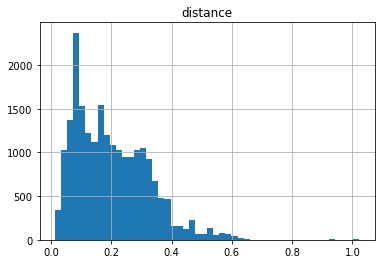

In [66]:
df.hist('distance', bins = 50)

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

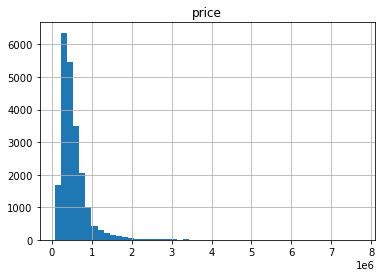

In [65]:
df.hist('price', bins = 50)

array([[<AxesSubplot:title={'center':'sqft_living'}>]], dtype=object)

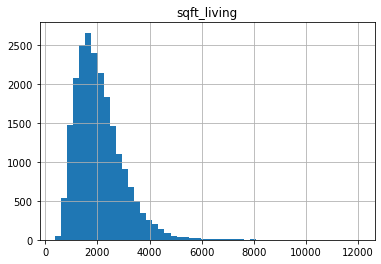

In [67]:
df.hist('sqft_living', bins = 50)

array([[<AxesSubplot:title={'center':'sqft_lot'}>]], dtype=object)

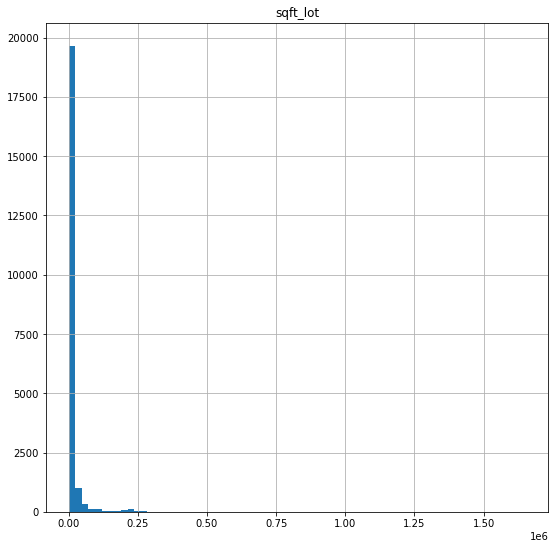

In [72]:
df.hist('sqft_lot', bins=70, figsize=(9,9))

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21595 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21595 non-null  object 
 1   price          21595 non-null  float64
 2   bedrooms       21595 non-null  int64  
 3   bathrooms      21595 non-null  float64
 4   sqft_living    21595 non-null  int64  
 5   sqft_lot       21595 non-null  int64  
 6   floors         21595 non-null  float64
 7   waterfront     19219 non-null  object 
 8   view           21595 non-null  int64  
 9   condition      21595 non-null  int64  
 10  grade          21595 non-null  int64  
 11  sqft_above     21595 non-null  int64  
 12  sqft_basement  21595 non-null  object 
 13  yr_built       21595 non-null  int64  
 14  yr_renovated   17753 non-null  float64
 15  zipcode        21595 non-null  int64  
 16  lat            21595 non-null  float64
 17  long           21595 non-null  float64
 18  sqft_l

In [ ]:
non_normal = ['distance', 'grade', 'floors', 'bedrooms', 'bathrooms', 'view', 'sqft_above', 'yr_renovated' ]
for feat in non_normal:
    data[feat] = data[feat].map(lambda x: np.log(x))

##### Test Train Split

In [37]:
X = df.drop('price', axis=1)
y= df['price']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [39]:
X_train

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,distance
2358,3/25/2015,3,1.00,1040,8122,1.0,NO,1,5,7,1040,0.0,1971,0.0,98198,47.3731,-122.312,1470,8676,0.233965
6405,3/4/2015,3,2.50,1880,4499,2.0,NO,1,3,8,1880,0.0,1993,0.0,98029,47.5664,-121.999,2130,5114,0.335469
937,10/7/2014,3,2.50,2020,6564,1.0,NO,1,3,7,1310,710.0,1994,0.0,98042,47.3545,-122.158,1710,5151,0.306045
19076,1/16/2015,5,4.00,4720,493534,2.0,NO,1,5,9,3960,760.0,1975,0.0,98027,47.4536,-122.009,2160,219542,0.357324
18799,6/18/2014,4,2.25,2190,4080,2.0,NO,1,3,8,1800,390.0,1918,0.0,98119,47.6425,-122.358,2100,4080,0.044593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,9/15/2014,3,2.50,2230,5800,2.0,NO,1,3,7,2230,0.0,2004,0.0,98065,47.5308,-121.847,2230,6088,0.490925
21577,3/17/2015,5,3.75,4170,8142,2.0,NO,3,3,10,4170,0.0,2006,NaN,98056,47.5354,-122.181,3030,7980,0.166865
5390,7/21/2014,4,1.50,1530,9000,1.0,NO,1,4,6,1530,0.0,1976,0.0,98014,47.6492,-121.908,1520,8500,0.426274
860,6/20/2014,1,0.75,380,15000,1.0,NO,1,3,5,380,0.0,1963,0.0,98168,47.4810,-122.323,1170,15000,0.125530


In [60]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5399 entries, 3686 to 15372
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5399 non-null   object 
 1   bedrooms       5399 non-null   int64  
 2   bathrooms      5399 non-null   float64
 3   sqft_living    5399 non-null   int64  
 4   sqft_lot       5399 non-null   int64  
 5   floors         5399 non-null   float64
 6   waterfront     4766 non-null   object 
 7   view           5399 non-null   int64  
 8   condition      5399 non-null   int64  
 9   grade          5399 non-null   int64  
 10  sqft_above     5399 non-null   int64  
 11  sqft_basement  5399 non-null   object 
 12  yr_built       5399 non-null   int64  
 13  yr_renovated   4435 non-null   float64
 14  zipcode        5399 non-null   int64  
 15  lat            5399 non-null   float64
 16  long           5399 non-null   float64
 17  sqft_living15  5399 non-null   int64  
 18  sqft

In [62]:
y_test

3686      132500.0
10246     313950.0
4037      494000.0
3437      355000.0
19291     606000.0
           ...    
8476      343000.0
11717    1580000.0
13876     374500.0
13478    1330000.0
15372     840500.0
Name: price, Length: 5399, dtype: float64

## Modeling

### Baseline Model

In [40]:
base_train_mean = y_train.mean()
base_train_mean

543303.2574709805

In [41]:
base_train_preds = [base_train_mean] * len(y_train)
base_test_preds = [base_train_mean] * len(y_test)

In [42]:
print(f"Train R2: {r2_score(y_train, base_train_preds)}")
print(f"Test R2: {r2_score(y_test, base_test_preds)}")
print('----')
print(f"Train RMSE: {mean_squared_error(y_train, base_train_preds, squared = False)}")
print(f"Test RMSE: {mean_squared_error(y_test, base_test_preds, squared = False)}")

Train R2: 0.0
Test R2: -0.001164501892552794
----
Train RMSE: 368714.2955544344
Test RMSE: 362612.29141276295


Interpretation: The baseline model predicts that every house has the value of the mean in this area. The model has very low R2 (close to zero) and the prediction is off by 362 thousand dollars on average.

### Explore Variables

In [43]:
# make a dataframe for our training data
df_train=pd.concat([y_train, X_train], axis = 1)
df_train

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,distance
2358,234000.0,3/25/2015,3,1.00,1040,8122,1.0,NO,1,5,...,1040,0.0,1971,0.0,98198,47.3731,-122.312,1470,8676,0.233965
6405,529000.0,3/4/2015,3,2.50,1880,4499,2.0,NO,1,3,...,1880,0.0,1993,0.0,98029,47.5664,-121.999,2130,5114,0.335469
937,253000.0,10/7/2014,3,2.50,2020,6564,1.0,NO,1,3,...,1310,710.0,1994,0.0,98042,47.3545,-122.158,1710,5151,0.306045
19076,745000.0,1/16/2015,5,4.00,4720,493534,2.0,NO,1,5,...,3960,760.0,1975,0.0,98027,47.4536,-122.009,2160,219542,0.357324
18799,855000.0,6/18/2014,4,2.25,2190,4080,2.0,NO,1,3,...,1800,390.0,1918,0.0,98119,47.6425,-122.358,2100,4080,0.044593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,440000.0,9/15/2014,3,2.50,2230,5800,2.0,NO,1,3,...,2230,0.0,2004,0.0,98065,47.5308,-121.847,2230,6088,0.490925
21577,1090000.0,3/17/2015,5,3.75,4170,8142,2.0,NO,3,3,...,4170,0.0,2006,NaN,98056,47.5354,-122.181,3030,7980,0.166865
5390,299800.0,7/21/2014,4,1.50,1530,9000,1.0,NO,1,4,...,1530,0.0,1976,0.0,98014,47.6492,-121.908,1520,8500,0.426274
860,245000.0,6/20/2014,1,0.75,380,15000,1.0,NO,1,3,...,380,0.0,1963,0.0,98168,47.4810,-122.323,1170,15000,0.125530


In [44]:
# pick the variables we are interested in and numeric
# see correlations between them and the target
df_explore=df_train.drop(['date', 'waterfront','zipcode', 'lat', 'long', 'sqft_basement'],axis=1)

In [45]:
df_explore.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.703730
grade            0.669421
sqft_above       0.603381
sqft_living15    0.590540
bathrooms        0.529581
view             0.399880
bedrooms         0.318156
floors           0.254563
yr_renovated     0.131064
sqft_lot         0.084421
sqft_lot15       0.080234
yr_built         0.049700
condition        0.041514
distance        -0.194612
Name: price, dtype: float64

<AxesSubplot:>

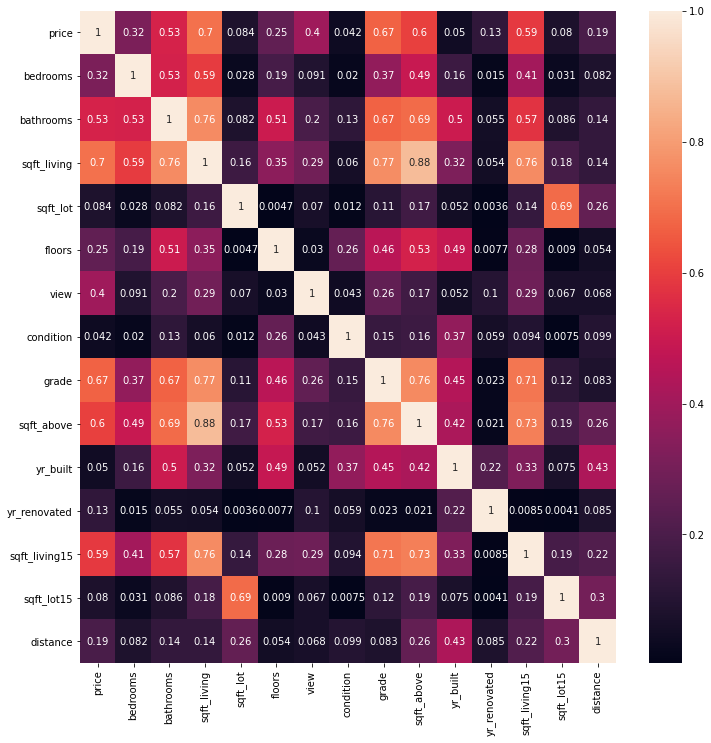

In [46]:
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_explore.corr().abs(), annot=True)

### Simple Model

Model the variable that has the highest correlation with price, which is sqft_living

In [47]:
simple_formula='price ~ sqft_living'
simple_model = ols(simple_formula, df_train).fit()
simple_model_summ = simple_model.summary()
simple_model_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.589e+04
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:40:33   Log-Likelihood:            -2.2504e+05
No. Observations:               16196   AIC:                         4.501e+05
Df Residuals:                   16194   BIC:                         4.501e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.726e+04   5117.509     -9.236      0.000   -5.73e+04   -3.72e+04
sqft_living   283.3842      2.248    126.049      0.000     278.977     287.791
==============================================================================
Omnibus:                    10297.337   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           273144.164
Skew:                           2.625   Prob(JB):                         0.00
Kurtosis:                      22.422   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
simple_train_preds=simple_model.predict(X_train)
simple_test_preds=simple_model.predict(X_test)

In [49]:
print(f"Train R2: {r2_score(y_train, simple_train_preds)}")
print(f"Test R2: {r2_score(y_test, simple_test_preds)}")
print('----')
print(f"Train RMSE: {mean_squared_error(y_train, simple_train_preds, squared = False)}")
print(f"Test RMSE: {mean_squared_error(y_test, simple_test_preds, squared = False)}")



Train R2: 0.4952362517108302
Test R2: 0.48516570404881854
----
Train RMSE: 261959.44067163262
Test RMSE: 260030.04727585675


Interpretation: The simple model is a big improvement from the baseline. R2 is 0.50 for training data and 0.49 for testing data and the prediction is off by around 260 thousand dollars on average. The R2 is still low and the RMSE is still too high. Model needs iteration.

#### Since we are doing a lot of assessment of our models, we can use a function for this repetitive work

In [50]:
def assess(model):
    
    tr_preds=model.predict(X_train)
    te_preds=model.predict(X_test)
    y_tr = y_train
    y_te = y_test
    print(f"Train R2: {r2_score(y_tr, tr_preds)}")
    print(f"Test R2: {r2_score(y_te, te_preds)}")
    print('----')
    print(f"Train RMSE: {mean_squared_error(y_tr, tr_preds, squared = False)}")
    print(f"Test RMSE: {mean_squared_error(y_te, te_preds, squared = False)}")
    print('----')
    print(f"Train MAE: {mean_absolute_error(y_tr, tr_preds)}")
    print(f"Test MAE: {mean_absolute_error(y_te, te_preds)}")

    tr_res= y_tr - tr_preds
    te_res= y_te - te_preds
    
    plt.scatter(tr_preds, tr_res, label = 'Train')
    plt.scatter(te_preds, te_res, label = 'Test')
    
    plt.axhline(y=0, color = 'red', label = '0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.legend()
    plt.show

Check to see if the function works

Train R2: 0.4952362517108302
Test R2: 0.48516570404881854
----
Train RMSE: 261959.44067163262
Test RMSE: 260030.04727585675
----
Train MAE: 174968.58987369284
Test MAE: 172486.36266115913


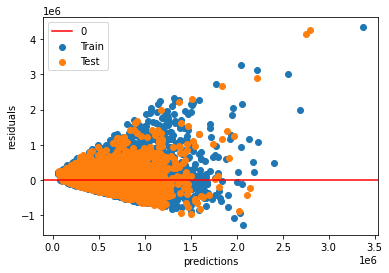

In [51]:
assess(simple_model)

In [53]:
features = df_train[['sqft_living', 'view', 'bathrooms']]

In [56]:
formula = 'price ~ ' + ' + '.join(features) 
multi_model = ols(formula, df_train).fit()
multi_model_summ = multi_model.summary()
multi_model_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     6248.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:41:48   Log-Likelihood:            -2.2435e+05
No. Observations:               16196   AIC:                         4.487e+05
Df Residuals:                   16192   BIC:                         4.487e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.209e+05   6168.968    -19.592      0.000   -1.33e+05   -1.09e+05
sqft_living   258.6848      3.410     75.862      0.000     252.001     265.369
view         1.021e+05   2691.663     37.943      0.000    9.69e+04    1.07e+05
bathrooms    -447.8239   3963.861     -0.113      0.910   -8217.429    7321.781
==============================================================================
Omnibus:                     9995.525   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           297486.283
Skew:                           2.472   Prob(JB):                         0.00
Kurtosis:                      23.406   Cond. No.                     7.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train R2: 0.5365328663526847
Test R2: 0.5285567344813877
----
Train RMSE: 251014.86853591134
Test RMSE: 248831.01903062157
----
Train MAE: 168294.40093517155
Test MAE: 165401.41987942054


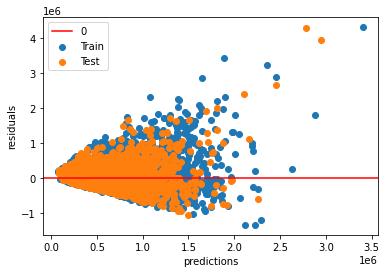

In [57]:
assess(multi_model)

In [58]:
df_explore.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.703730
grade            0.669421
sqft_above       0.603381
sqft_living15    0.590540
bathrooms        0.529581
view             0.399880
bedrooms         0.318156
floors           0.254563
yr_renovated     0.131064
sqft_lot         0.084421
sqft_lot15       0.080234
yr_built         0.049700
condition        0.041514
distance        -0.194612
Name: price, dtype: float64

In [74]:
non_normal = ['distance', 'grade', 'floors', 'bedrooms', 'bathrooms', 'view', 'sqft_above', 'yr_renovated', 'condition', '' ]
for feat in non_normal:
    X_train_log[feat] = X_train[feat].map(lambda x: np.log(x))

NameError: name 'X_train_log' is not defined

In [ ]:
formula = 'price ~ ' + ' + '.join(features) 
multi_model = ols(formula, df_train).fit()
multi_model_summ = multi_model.summary()
multi_model_summ

In [76]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16196 entries, 2358 to 15796
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           16196 non-null  object 
 1   bedrooms       16196 non-null  int64  
 2   bathrooms      16196 non-null  float64
 3   sqft_living    16196 non-null  int64  
 4   sqft_lot       16196 non-null  int64  
 5   floors         16196 non-null  float64
 6   waterfront     14453 non-null  object 
 7   view           16196 non-null  int64  
 8   condition      16196 non-null  int64  
 9   grade          16196 non-null  int64  
 10  sqft_above     16196 non-null  int64  
 11  sqft_basement  16196 non-null  object 
 12  yr_built       16196 non-null  int64  
 13  yr_renovated   13318 non-null  float64
 14  zipcode        16196 non-null  int64  
 15  lat            16196 non-null  float64
 16  long           16196 non-null  float64
 17  sqft_living15  16196 non-null  int64  
 18  sqf

In [84]:
df_train_log = df_train.copy()

In [85]:
non_normal = ['distance', 'grade', 'floors', 'bedrooms', 'bathrooms', 'sqft_above', 'sqft_living', 'yr_renovated', 'condition', 'sqft_lot15', 'sqft_living15'  ]
for feat in non_normal:
    df_train_log[feat] = df_train_log[feat].map(lambda x: np.log(x))

<ipython-input-85-3c6bba2fca81>:3: RuntimeWarning:

divide by zero encountered in log



In [88]:
X_test_log = X_test.copy()
for feat in non_normal:
    X_test_log[feat] = X_test_log[feat].map(lambda x: np.log(x))

<ipython-input-88-cdb5b26c7c57>:3: RuntimeWarning:

divide by zero encountered in log



<AxesSubplot:>

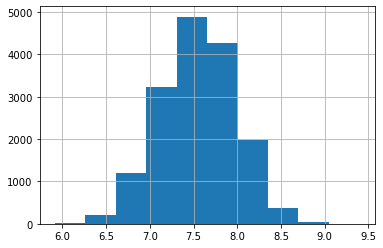

In [86]:
df_train_log['sqft_living'].hist()

In [1]:
formula = 'price ~ sqft_living' 
multi_model = ols(formula, df_train_log).fit()
multi_model_summ = multi_model.summary()
multi_model_summ

NameError: name 'ols' is not defined